In [1]:
from aurora.solver import PWE2D
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 301
x = np.arange(-N//2+1, N//2+1)
X, Y = np.meshgrid(x, x)
struct = np.ones((N, N, 1))
struct[X**2+Y**2<(0.2*N)**2] = 8.9

In [3]:
a1, a2 = [1 , 0.0], [0, 1]
from aurora.lattice import Lattice
l = Lattice(a1, a2)
path = l.bz_path(["G", "X", "M", "G"], [10, 10, 10])

In [4]:
solver = PWE2D()
te, tm = solver.solve_kpoints(struct, path, (5, 5), (1.0, 1.0))

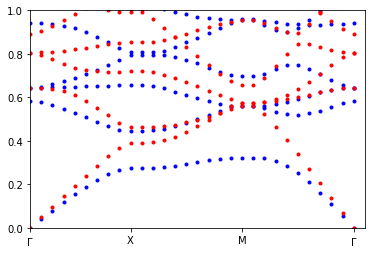

In [11]:
import matplotlib.pyplot as plt
for o in te.T:
    plt.plot(o, 'b.')
for o in tm.T:
    plt.plot(o, 'r.')
plt.axis([0, 30, 0, 1])
plt.xticks([0, 9, 19, 29], ["$\Gamma$", "X", "M", "$\Gamma$"])
plt.ylabel("$\nicefrac{\omega a}{2\pi c}$")
plt.savefig("figs/joa/5/2.png")